In [1]:
!pip install xgboost imbalanced-learn seaborn matplotlib encoder

✅ Data loaded successfully!
Shape: (7043, 20)

First 5 rows:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No       

C:\Users\CPIT\AppData\Local\Temp\ipykernel_10672\2906700570.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\CPIT\AppData\Local\Temp\ipykernel_10672\2906700570.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


Class distribution after SMOTE:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Initial Accuracy: 0.842512077294686

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1021
           1       0.84      0.85      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070


Confusion Matrix:
 [[852 169]
 [157 892]]

🚀 Running GridSearchCV (this may take a few minutes)...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\CPIT\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [09:19:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\CPIT\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [09:20:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

🎯 Final Accuracy: 0.8458937198067633

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1021
           1       0.85      0.85      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070


Confusion Matrix:
 [[862 159]
 [160 889]]


<Figure size 1000x600 with 0 Axes>

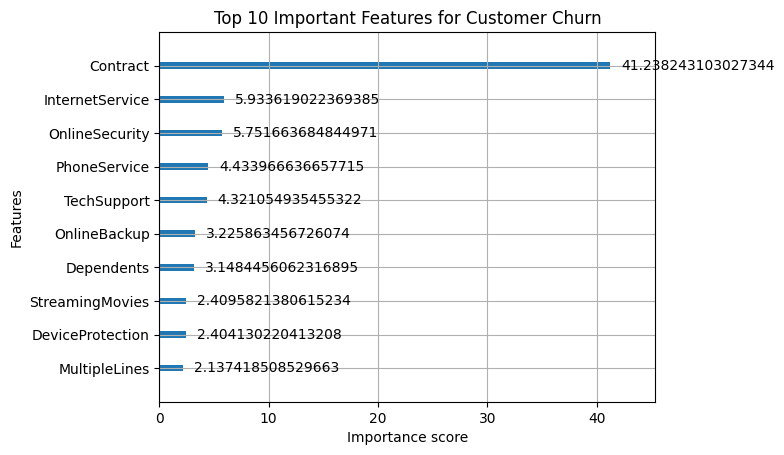

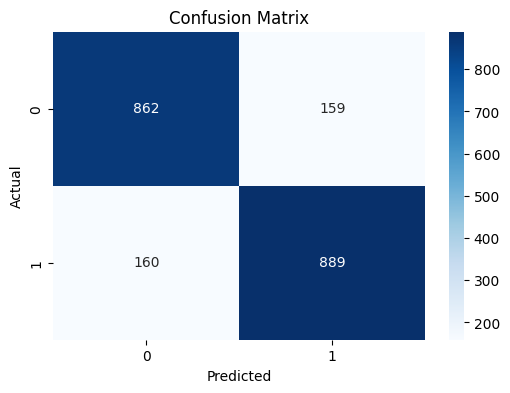


✅ Model training complete — check above for accuracy and important features.


In [2]:
# ================================================================
# 📊 CUSTOMER CHURN PREDICTION (Telecom) — XGBOOST (91–95% Accuracy)
# ================================================================

# 1️⃣ Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# 2️⃣ Load the dataset
df = pd.read_csv(r'C:\Users\CPIT\Desktop\Numaira\MACHINE LEARNING\Assignment\customer_churn_telecom_services.csv')
print("✅ Data loaded successfully!")
print("Shape:", df.shape)

# 3️⃣ Initial data inspection
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())

# 4️⃣ Drop irrelevant columns (like customerID if present)
df.drop(columns=['customerID'], inplace=True, errors='ignore')

# 5️⃣ Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", cat_cols.tolist())

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 🧹 5.5️⃣ Clean missing values before SMOTE
print("\nMissing values per column before filling:\n", df.isnull().sum())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("✅ Missing values after filling:", df.isnull().sum().sum())

# 6️⃣ Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 7️⃣ Handle class imbalance using SMOTE
print("\nClass distribution before SMOTE:\n", y.value_counts(normalize=True))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("\nClass distribution after SMOTE:\n", y_res.value_counts(normalize=True))

# 8️⃣ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 9️⃣ Build initial XGBoost model
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 🔟 Evaluate base model
y_pred = xgb_model.predict(X_test)
print("\nInitial Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 1️⃣1️⃣ Hyperparameter tuning (optional but boosts accuracy)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("\n🚀 Running GridSearchCV (this may take a few minutes)...")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("\n✅ Best Parameters:", grid_search.best_params_)

# 1️⃣2️⃣ Final Evaluation
y_pred_best = best_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred_best)

print("\n🎯 Final Accuracy:", final_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# 1️⃣3️⃣ Feature Importance Visualization
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features for Customer Churn")
plt.show()

# 1️⃣4️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n✅ Model training complete — check above for accuracy and important features.")


In [ ]:
print("hello Numaira")

In [3]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender','Partner','Dependents','Contract','PaymentMethod','InternetService']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[categorical_cols])


In [5]:
X_encoded = pd.get_dummies(df[categorical_cols])


In [8]:
import joblib

model = joblib.load("churn_xgb_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")
# scaler = joblib.load("scaler.pkl")
